## Clustering and PCA Analysis on the Iris Dataset. 
### The dataset contains data on flowers like their petal length, petal width, sepal length and sepal width.
### Each flower belongs to one of three species: Iris-setosa, Iris-virginica, Iris-versicolor.

In [35]:
import pandas as pd
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

def get_class(x):
    if x=="Iris-setosa":
        return 0;
    if x=="Iris-virginica":
        return 1;
    if x=="Iris-versicolor":
        return 2;
    
iris_data[4] = iris_data[4].apply(get_class)
iris_array=iris_data.to_numpy()
iris_array


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

### Hierarchical Clustering

       0    1    2    3  4  clusters
0    5.1  3.5  1.4  0.2  0         1
1    4.9  3.0  1.4  0.2  0         1
2    4.7  3.2  1.3  0.2  0         1
3    4.6  3.1  1.5  0.2  0         1
4    5.0  3.6  1.4  0.2  0         1
..   ...  ...  ...  ... ..       ...
145  6.7  3.0  5.2  2.3  1         0
146  6.3  2.5  5.0  1.9  1         0
147  6.5  3.0  5.2  2.0  1         0
148  6.2  3.4  5.4  2.3  1         0
149  5.9  3.0  5.1  1.8  1         0

[150 rows x 6 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


(0.0, 10.0)

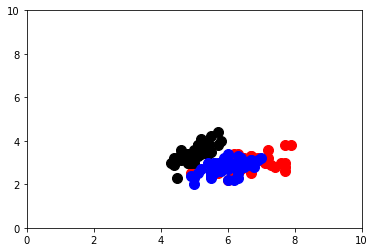

In [108]:
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(iris_array, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
iris_data['clusters'] = hc.fit_predict(iris_array)
print(iris_data)



plt.scatter(iris_array[y_hc ==0,0], iris_array[y_hc == 0,1], s=100, c='red')
plt.scatter(iris_array[y_hc==1,0], iris_array[y_hc == 1,1], s=100, c='black')
plt.scatter(iris_array[y_hc ==2,0], iris_array[y_hc == 2,1], s=100, c='blue')
plt.xlim(0,10)
plt.ylim(0,10)

### PCA

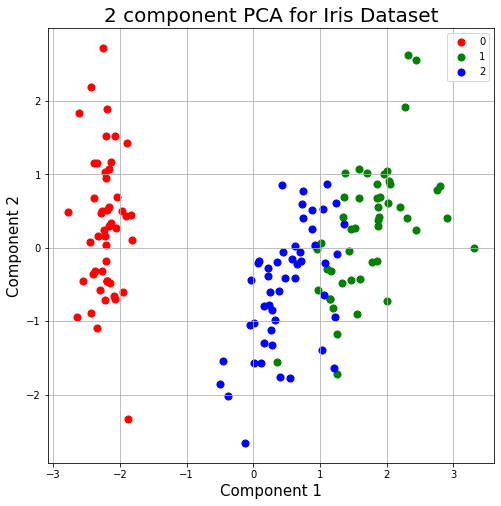

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = [0, 1, 2, 3]
# Separating out the features
x = iris_data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
            
                           
finalDf = pd.concat([principalDf, iris_data[[4]]], axis = 1)         

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA for Iris Dataset', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[4] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Clusters are decided by flower class. Maybe by removing the class and performing analysis again we could gain some information.


(2.0, 6.0)

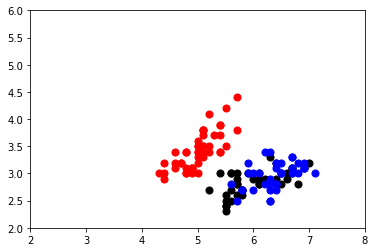

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "target"])
data = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
#sns.heatmap(df.corr(),cmap="seismic",linewidths=0.4)
dbs = DBSCAN(eps=0.4, min_samples=4)
y_hc = dbs.fit_predict(data)
plt.scatter(data[y_hc == 0,0], data[y_hc == 0,1], s=50, c='red')
plt.scatter(data[y_hc == 1,0], data[y_hc == 1,1], s=50, c='black')
plt.scatter(data[y_hc == 2,0], data[y_hc == 2,1], s=50, c='blue')
plt.xlim(2,8)
plt.ylim(2,6)


#### Plot visualisation of the clusters is not very helpful  because there are too many dimensions to be plotted on 2D. The clusters overlap greatly even though each data row is clearly assigned to one cluster. We can still gain information from this: We have 2 clusters with very similar features and one clusters that differs a lot from the other ones. We can't tell from the plot what these features are ( similar sepal width to height ratio? or petal width? petal height?)

#### With PCA we now have a clearer plot but we don't have any new information on the dataset that couldn't be gained from clustering before.  For visual analysis alone PCA wasn't really needed in this case.